In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/기계/heart_2020_cleaned.csv')

df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


<AxesSubplot:>

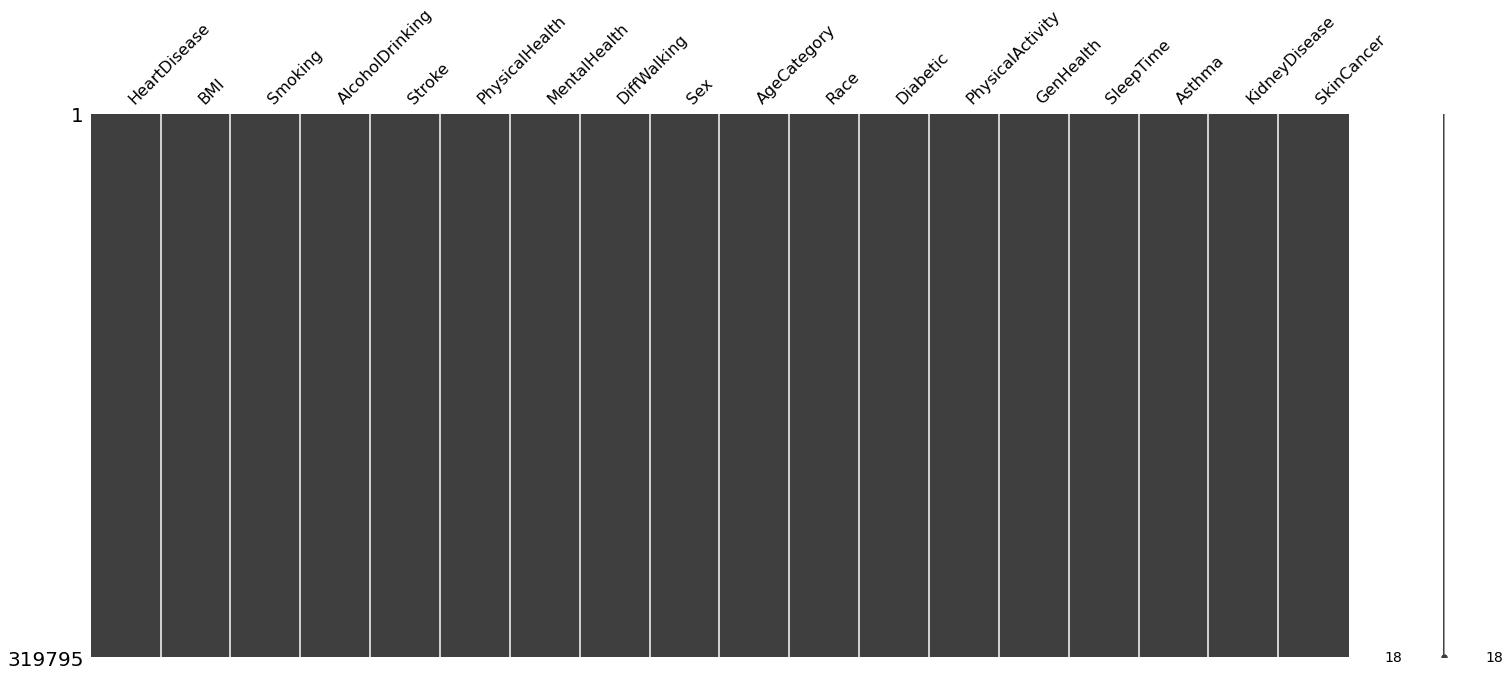

In [ ]:
import missingno as msno

#결측치 없음
msno.matrix(df)

array([[<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'PhysicalHealth'}>],
       [<AxesSubplot:title={'center':'MentalHealth'}>,
        <AxesSubplot:title={'center':'SleepTime'}>]], dtype=object)

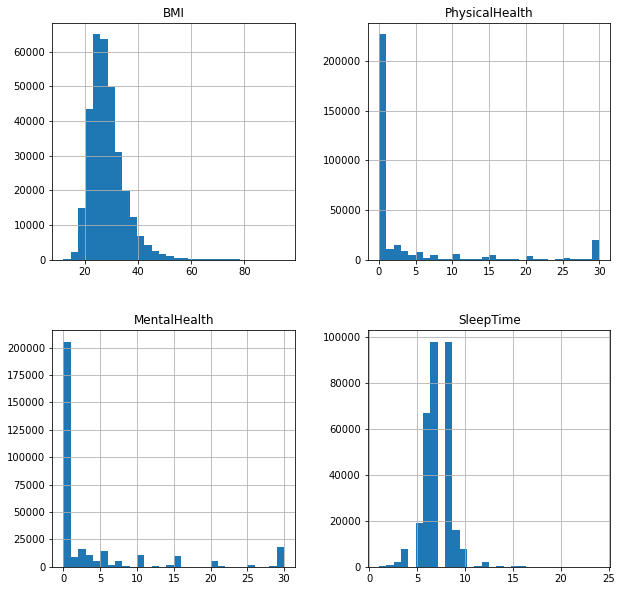

In [ ]:
df.hist(bins=30, figsize=(10, 10))

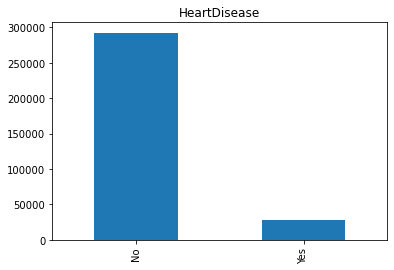

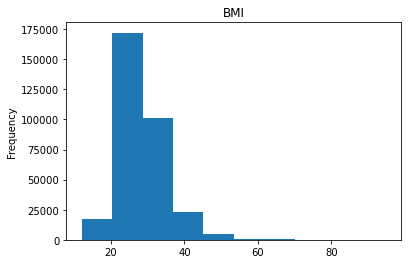

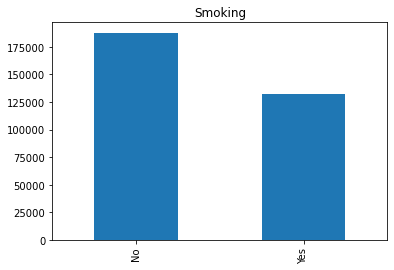

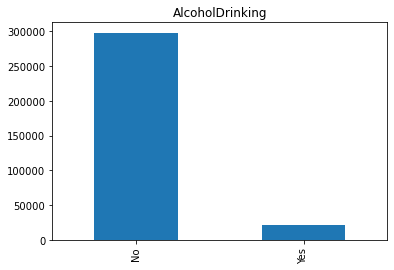

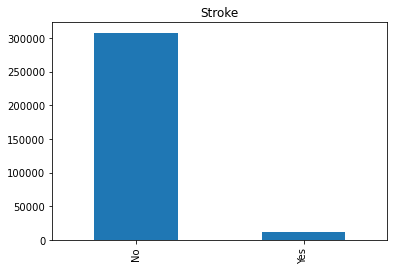

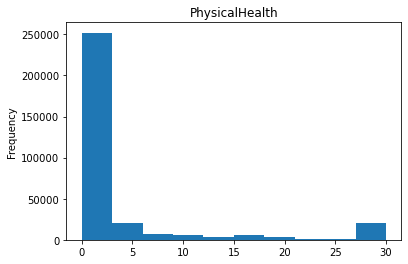

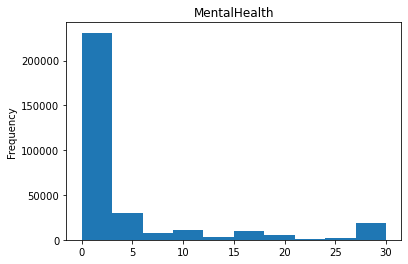

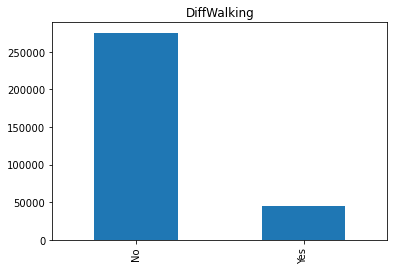

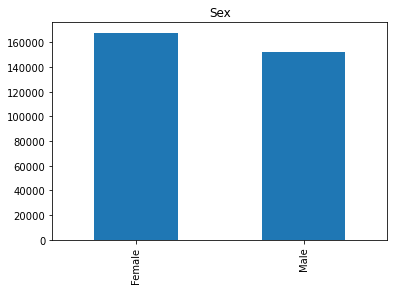

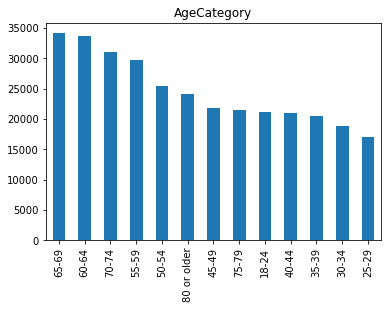

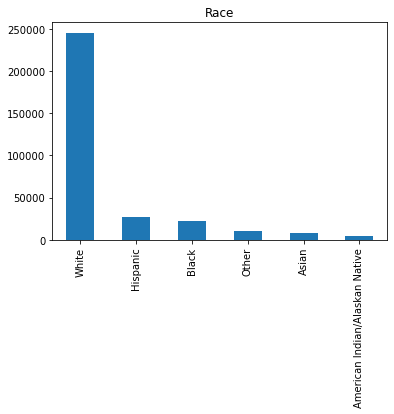

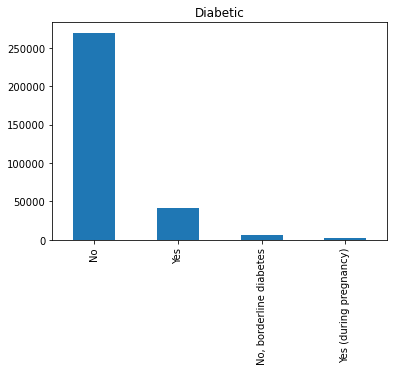

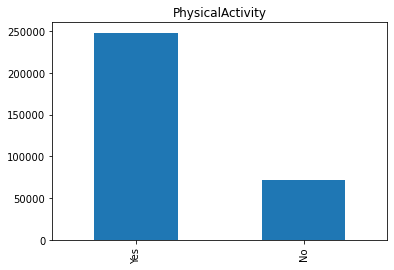

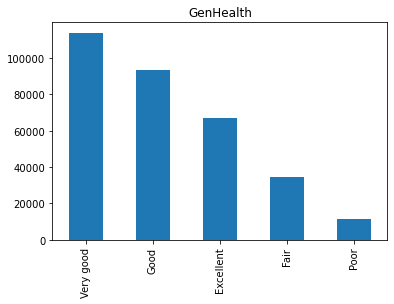

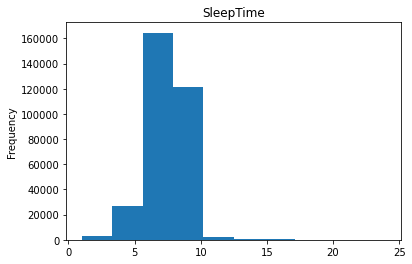

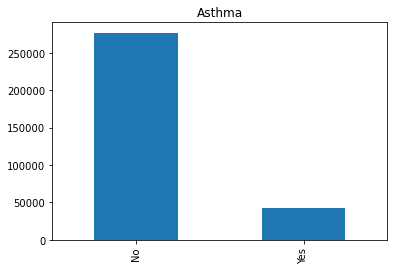

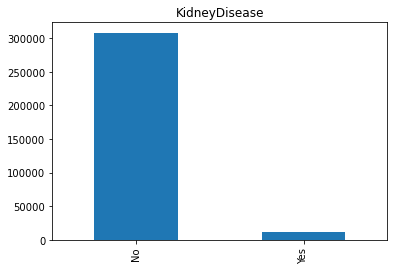

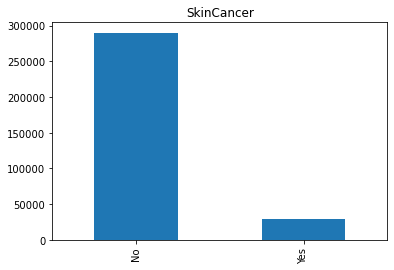

In [ ]:
#데이터들의 빈도그래프
for col in df:
    plt.figure(col)
    plt.title(col)
    if is_numeric_dtype(df[col]):
        df[col].plot(kind='hist')
    elif is_string_dtype(df[col]):
        df[col].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

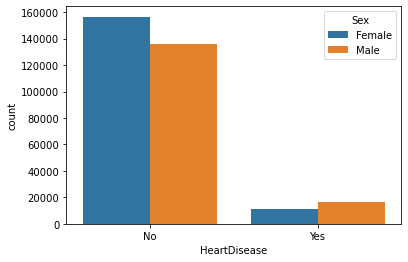

In [ ]:
#심장병 성별
sns.countplot(data=df, x='HeartDisease', hue='Sex')

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

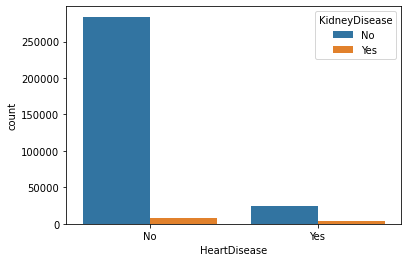

In [ ]:
#심장병 신장질환
sns.countplot(data=df, x='HeartDisease', hue='KidneyDisease')

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

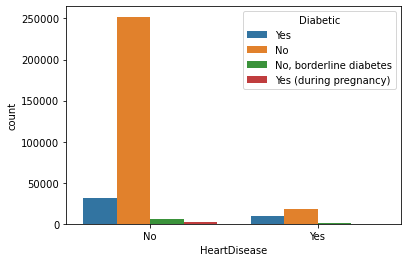

In [ ]:
#심장병 당뇨병
sns.countplot(data=df, x='HeartDisease', hue='Diabetic')

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

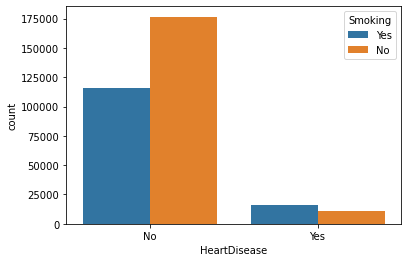

In [ ]:
#심장병 담배
sns.countplot(data=df, x='HeartDisease', hue='Smoking')

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

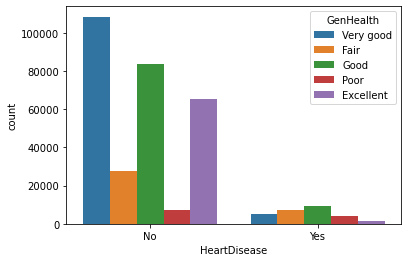

In [ ]:
#심장병 건강
sns.countplot(data=df, x='HeartDisease', hue='GenHealth')

<AxesSubplot:xlabel='GenHealth', ylabel='count'>

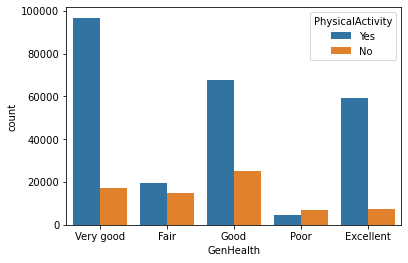

In [ ]:
#건강과 최근운동
sns.countplot(data=df, x='GenHealth', hue='PhysicalActivity')

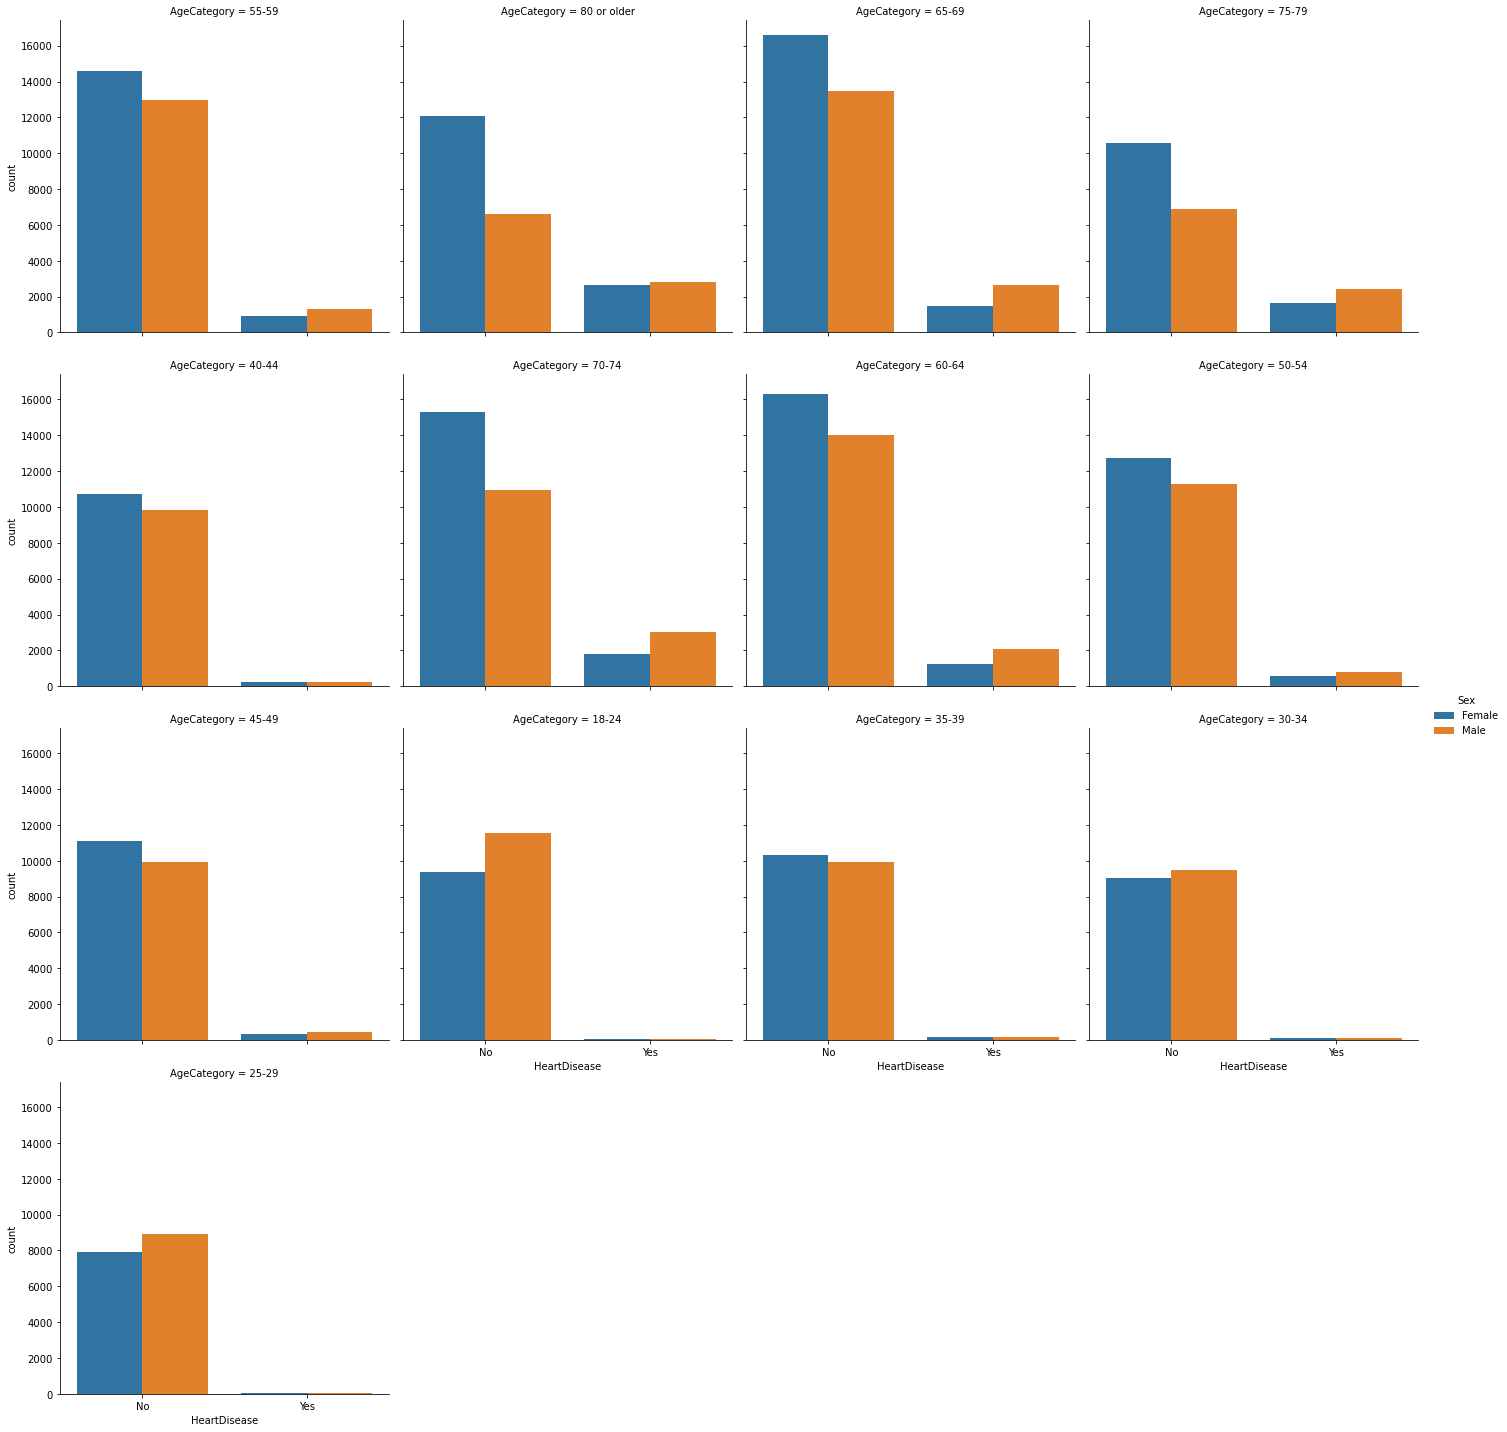

In [ ]:
sns.catplot(data=df, x='HeartDisease', kind='count', hue='Sex', col='AgeCategory', col_wrap=4)
#연령대 별 심장질환
#남성이 여성보다 심장질환에 많이 걸린다
#나이가 많을수록 심장질환에 걸린 사람들이 많다.

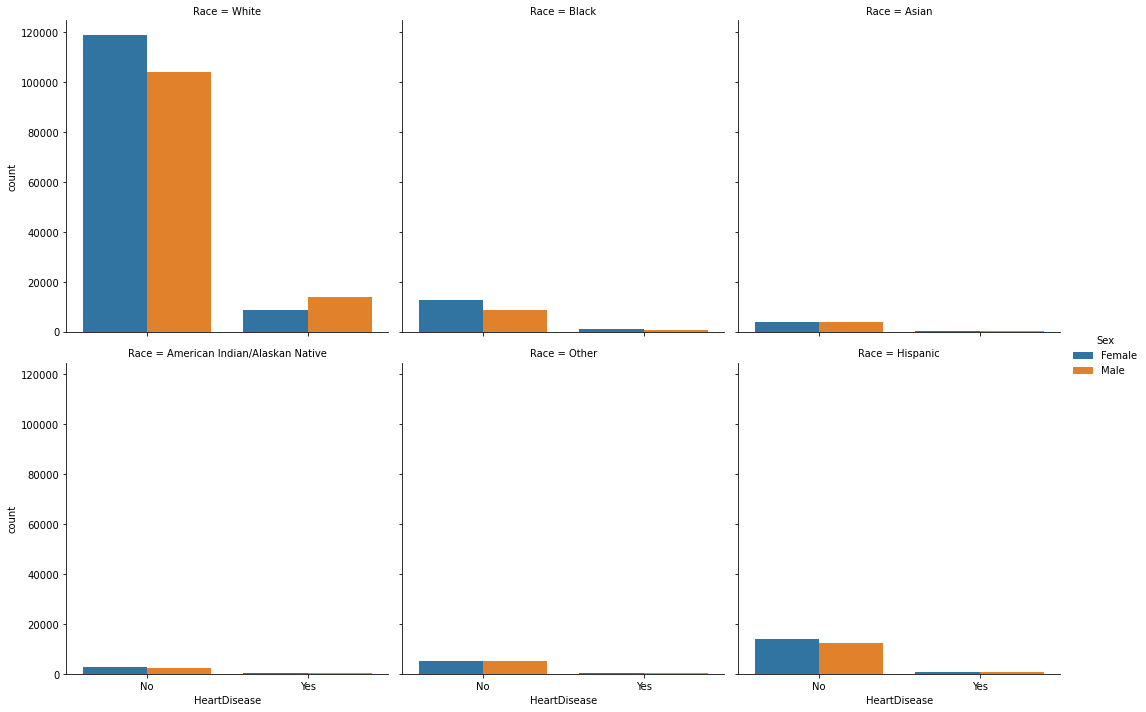

In [ ]:
#심장병 인종
sns.catplot(data=df, x='HeartDisease', kind='count', hue='Sex', col='Race', col_wrap=3)

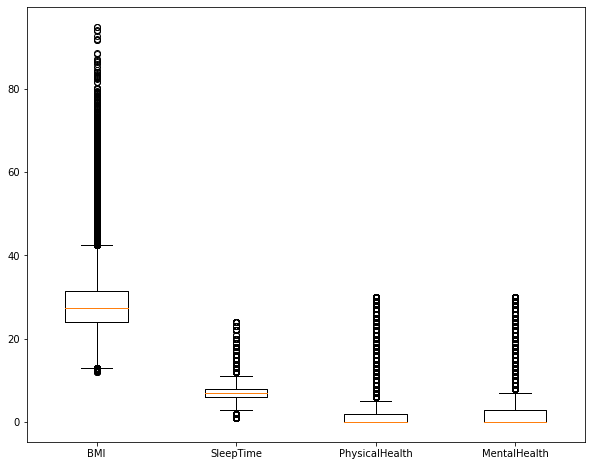

In [5]:
#이상치 시각화
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,8))
ax.boxplot([df['BMI'], df['SleepTime'], df['PhysicalHealth'], df['MentalHealth']])
plt.xticks([1, 2, 3, 4], ['BMI', 'SleepTime', 'PhysicalHealth', 'MentalHealth'])
plt.show()

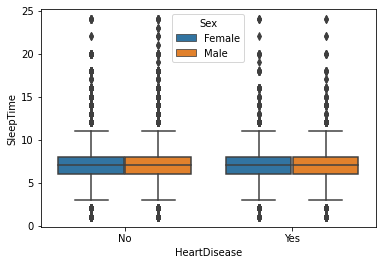

In [6]:
sns.boxplot(x="HeartDisease", y="SleepTime", hue="Sex", data=df)
plt.show()

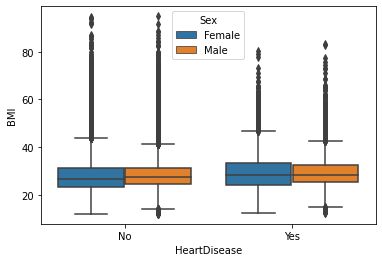

In [7]:
sns.boxplot(x="HeartDisease", y="BMI", hue="Sex", data=df)
plt.show()

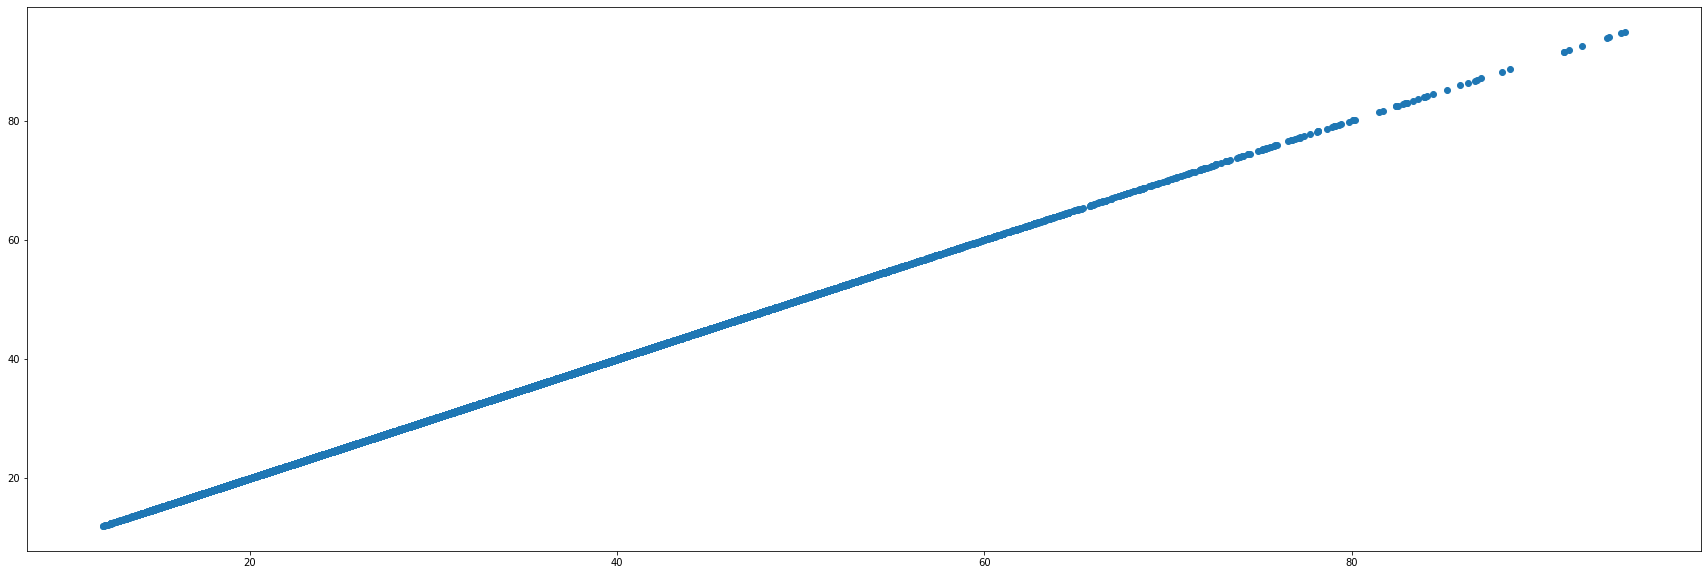

In [8]:
plt.figure(figsize=(30,10))
plt.scatter(df['BMI'],df['BMI'])
plt.show()